In [4]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="Chinese-Landscape-Painting-Style-Transfer", split="train")
dataset[0]["text"]

Resolving data files: 100%|██████████| 3560/3560 [00:00<00:00, 6748.01it/s] 
Using custom data configuration default-24d6bd0684d8af95
Reusing dataset imagefolder (/root/.cache/huggingface/datasets/imagefolder/default-24d6bd0684d8af95/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff)


'a chinese landscape painting of a mountain with a sky background'

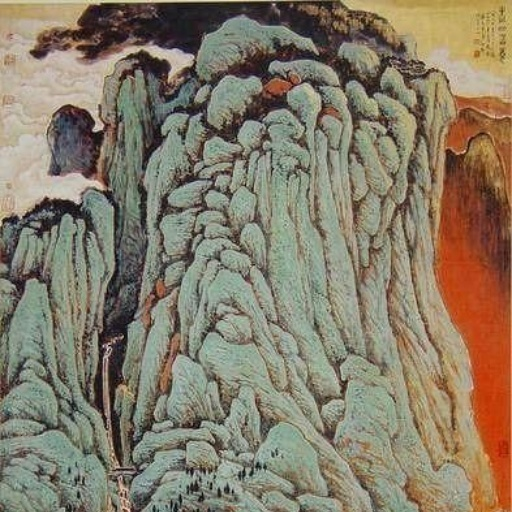

In [5]:
dataset[0]['image']

In [ ]:
# Run training
!(python main.py \
    -t \
    --base configs/stable-diffusion/landscape_paintings.yaml \
    --gpus "0," \
    --scale_lr False \
    --num_nodes 1 \
    --check_val_every_n_epoch 1 \
    --finetune_from "sd-v1-4-full-ema/last.ckpt" \
    data.params.batch_size=4 \
    lightning.trainer.accumulate_grad_batches=1 \
    data.params.validation.params.n_gpus=1 \
)

In [8]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a landscape with mountains and a river' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt "logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt")

Global seed set to 42
Loading model from logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.19.self_attn.k_proj.weight', 'vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.1.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.mlp.fc2.bias', 'vision_model.encoder.layers.9.self_attn.k_proj.weight', 'vision_model.encoder.layers.12.layer_norm2.weight', 'vision_model.encoder.layers.9.mlp.fc1.weight', 'vision_model.encoder.layers.17.self_attn.v_proj.bias', 'vision_model.encoder.layers.0.layer_norm1.bias', 'vi

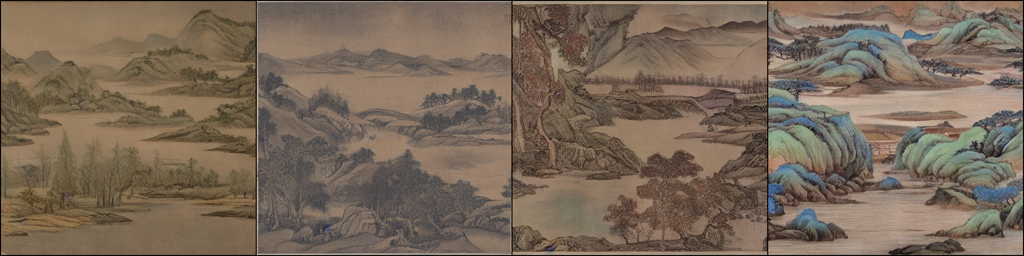

a chinese landscape painting of a landscape with mountains and a river


In [9]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0000.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a landscape with mountains and a river")

In [11]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a mountain with trees on it' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt "logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt")

Global seed set to 42
Loading model from logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.1.self_attn.v_proj.bias', 'vision_model.encoder.layers.6.layer_norm1.weight', 'vision_model.encoder.layers.6.self_attn.v_proj.bias', 'vision_model.encoder.layers.10.mlp.fc1.weight', 'vision_model.encoder.layers.22.self_attn.q_proj.bias', 'vision_model.encoder.layers.1.layer_norm1.weight', 'vision_model.encoder.layers.6.self_attn.v_proj.weight', 'vis

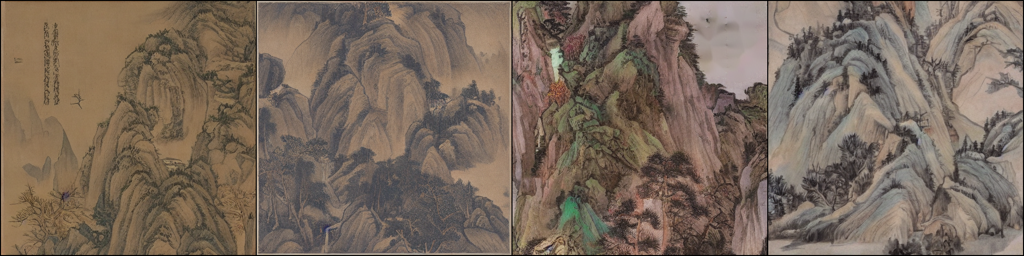

a chinese landscape painting of a mountain with trees on it


In [16]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0001.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a mountain with trees on it")

In [17]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a building with trees in front of it' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt "logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt")


Global seed set to 42
Loading model from logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.3.mlp.fc1.weight', 'vision_model.encoder.layers.18.self_attn.q_proj.weight', 'vision_model.encoder.layers.22.self_attn.out_proj.weight', 'vision_model.encoder.layers.21.self_attn.v_proj.bias', 'vision_model.encoder.layers.13.mlp.fc1.weight', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.19.self_attn.out_proj.bias', 'vision_model.encoder.layers.14.self_attn.q_proj.bias', 'vision_model.encoder.layers.16.layer_nor

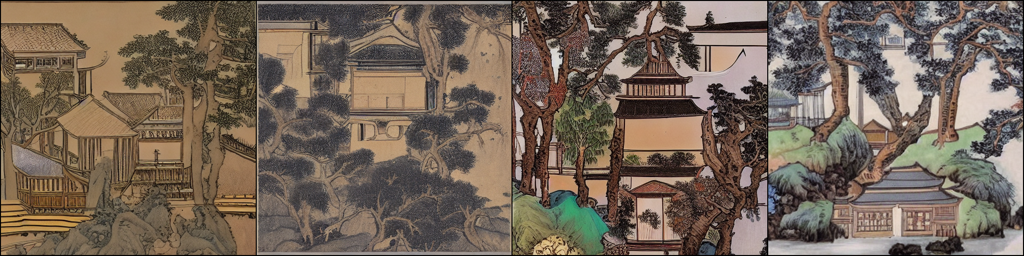

a chinese landscape painting of a building with trees in front of it


In [18]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0002.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a building with trees in front of it")

In [19]:
# Run the model
!(python scripts/txt2img.py \
    --prompt 'a chinese landscape painting of a man standing on top of a cliff' \
    --outdir 'outputs/generated_pl' \
    --H 512 --W 512 \
    --n_samples 4 \
    --config 'configs/stable-diffusion/landscape_paintings.yaml' \
    --ckpt "logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt")

Global seed set to 42
Loading model from logs/2023-03-13T10-22-06_landscape_paintings/checkpoints/last.ckpt
Global Step: 30000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
Keeping EMAs of 688.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.23.self_attn.q_proj.bias', 'vision_model.encoder.layers.14.self_attn.q_proj.weight', 'vision_model.encoder.layers.22.layer_norm2.bias', 'vision_model.encoder.layers.21.layer_norm2.weight', 'vision_model.encoder.layers.10.self_attn.q_proj.bias', 'vision_model.encoder.layers.8.layer_norm1.bias', 'vision_model.encoder.layers.1.self_attn.q_proj.bias', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vi

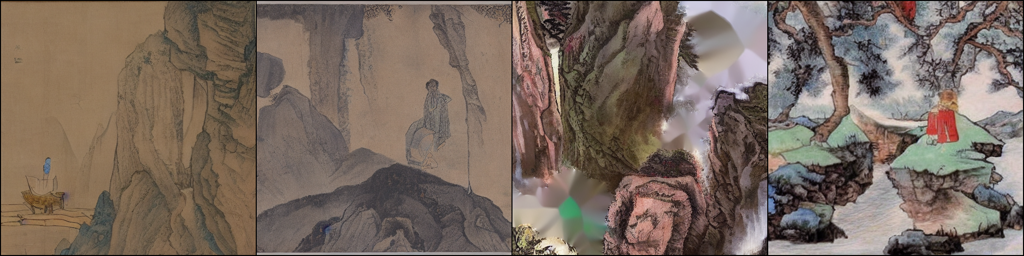

a chinese landscape painting of a man standing on top of a cliff


In [20]:
from PIL import Image
im = Image.open("outputs/generated_pl/grid-0003.png").resize((1024, 256))
display(im)
print("a chinese landscape painting of a man standing on top of a cliff")